In [1]:
%matplotlib inline

In [2]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [31]:
## upload file

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))

Saving rgbmap.png to rgbmap (2).png


In [32]:
# converting file to Image object
img = Image.open(filename)

#Image.open(filename)

In [33]:
(left, upper, right, lower) = (20, 20, 100, 100)
crop_test = img.crop((left, upper, right, lower))



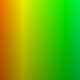

In [34]:
crop_test

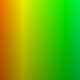

In [35]:
display(crop_test)

In [36]:
# putting all cropped images in list

listtest = []

# each cropped image is 25x25
for i in range(0, img.width-25, 25):
  for j in range(0, img.height-25, 25):
    listtest.append(img.crop((j, i, j+25, i+25)))
    crop = img.crop((j, i, j+25, i+25))
    ## display(crop)


In [67]:

for i in range(len(listtest)):
  #np.average(crop, axis=(0,1))
  hi = np.average((listtest[i]), axis=(0,1))
  print(hi)


[243.      68.4272   0.    ]
[237.5184 206.1328   0.    ]
[131.5568 243.       0.    ]
[ 12.4336 243.      23.8208]
[  0.     243.     154.4672]
[  0.     187.88   242.0352]
[  2.2016  47.8432 243.    ]
[ 97.0704   0.     243.    ]
[223.832    0.     226.7184]
[243.       0.     102.8752]
[218.      61.3248   0.    ]
[213.0624 184.8976   0.    ]
[117.9488 218.       0.    ]
[ 11.136  218.      21.3584]
[  0.     218.     138.5344]
[  0.     168.4848 217.1248]
[  1.9808  42.8752 218.    ]
[ 87.0432   0.     218.    ]
[200.7872   0.     203.3552]
[218.      0.     92.216]
[193.     54.224   0.   ]
[188.6048 163.6448   0.    ]
[104.36 193.     0.  ]
[  9.8288 193.      18.864 ]
[  0.    193.    122.584]
[  0.     149.1008 192.208 ]
[  1.7424  37.896  193.    ]
[ 76.9872   0.     193.    ]
[177.7152   0.     180.    ]
[193.       0.      81.5728]
[168.      47.1408   0.    ]
[164.1488 142.3904   0.    ]
[ 90.7728 168.       0.    ]
[  8.536  168.      16.3856]
[  0.     168.     106.6448]


In [85]:
def find_Avg_Color(cropped_average, original_array):
  r = cropped_average[0]
  g = cropped_average[1]
  b = cropped_average[2]

  current_lowest = 1000
  lowest_index = 0;
  for i in range(len(original_array)):
    total_difference = 0;
    curr_avg = np.average(original_array[i], axis=(0,1))
    #print(curr_avg)

    total_difference += abs(r - curr_avg[0])
    total_difference += abs(g - curr_avg[1])
    total_difference += abs(b - curr_avg[2])

    if (total_difference < current_lowest):
      current_lowest = total_difference
      lowest_index = i

  return lowest_index


In [52]:
for i in range(len(listtest)):
  display(listtest[i])

In [76]:
test_img_file = files.upload()

test_img_filename = next(iter(test_img_file))
library_img = Image.open(test_img_filename)

Saving test.png to test.png


In [94]:
copy = library_img.copy()
library_arr = []

copy1 = library_img.copy().convert('RGB')
png = np.array(copy1)

counter = 0
for i in range(0, library_img.width + 100, 25):
  for j in range(0, library_img.height + 100, 25):
    library_arr.append(library_img.crop((j, i, j+25, i+25)))
    crop = library_img.crop((j, i, j+25, i+25))
    curr_avg = np.average(crop, axis=(0,1))



    new_img = listtest[find_Avg_Color(curr_avg, listtest)]
    # Image.putdata(data, scale=1.0, offset=0.0)
    # left, upper, right, and lower
    Image.Image.paste(copy, new_img, (j, i, j+25, i+25))

    counter+=1
    print("progress: " + str(counter) + "/" + str(((library_img.width/25) * (library_img.height/25))))
    ## searching the original picture for a similar color

progress: 1/239.4112
progress: 2/239.4112
progress: 3/239.4112
progress: 4/239.4112
progress: 5/239.4112
progress: 6/239.4112
progress: 7/239.4112
progress: 8/239.4112
progress: 9/239.4112
progress: 10/239.4112
progress: 11/239.4112
progress: 12/239.4112
progress: 13/239.4112
progress: 14/239.4112
progress: 15/239.4112
progress: 16/239.4112
progress: 17/239.4112
progress: 18/239.4112
progress: 19/239.4112
progress: 20/239.4112
progress: 21/239.4112
progress: 22/239.4112
progress: 23/239.4112
progress: 24/239.4112
progress: 25/239.4112
progress: 26/239.4112
progress: 27/239.4112
progress: 28/239.4112
progress: 29/239.4112
progress: 30/239.4112
progress: 31/239.4112
progress: 32/239.4112
progress: 33/239.4112
progress: 34/239.4112
progress: 35/239.4112
progress: 36/239.4112
progress: 37/239.4112
progress: 38/239.4112
progress: 39/239.4112
progress: 40/239.4112
progress: 41/239.4112
progress: 42/239.4112
progress: 43/239.4112
progress: 44/239.4112
progress: 45/239.4112
progress: 46/239.41

In [70]:
copy1 = library_img.copy().convert('RGB')
png = np.array(copy1)
print(png)

[[[170 174 177]
  [172 173 175]
  [174 172 175]
  ...
  [183 170 161]
  [183 170 161]
  [190 176 167]]

 [[171 170 175]
  [175 173 176]
  [182 176 178]
  ...
  [183 166 150]
  [187 169 155]
  [200 182 168]]

 [[175 169 173]
  [185 174 178]
  [194 179 182]
  ...
  [194 168 143]
  [198 172 147]
  [217 191 166]]

 ...

 [[166 170 171]
  [143 147 148]
  [127 131 132]
  ...
  [ 94  95  97]
  [ 94  95  97]
  [ 94  95  97]]

 [[173 177 178]
  [169 173 174]
  [175 179 180]
  ...
  [108 109 111]
  [108 109 111]
  [108 109 111]]

 [[172 176 177]
  [175 179 180]
  [179 183 184]
  ...
  [141 142 144]
  [141 142 144]
  [141 142 144]]]


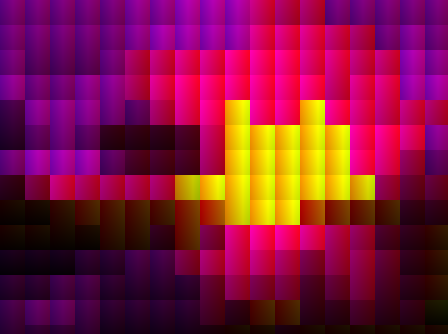

In [95]:
display(copy)

In [22]:
## testing

print(len(listtest))
display(listtest[150])

100


IndexError: list index out of range

In [ ]:
## testing

## get average color
avg = np.average(listtest[150], axis=(0,1))
display(avg)
display(listtest[150])
display()

array([140.1952, 140.1952, 177.1072, 255.    ])

In [ ]:
## calculating dominant color
from skimage import io

average = listtest[0].mean(axis=0).mean(axis=0)

pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

dominant = palette[np.argmax(counts)]
display(dominant)

AttributeError: mean

In [ ]:
def dominant_color(arr):
  #test = io.imread(filename)[:, :, :-1]
  average = img.mean(axis=0).mean(axis=0)

  pixels = np.float32(img.reshape(-1, 3))

  n_colors = 5
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
  flags = cv2.KMEANS_RANDOM_CENTERS

  _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
  _, counts = np.unique(labels, return_counts=True)

  dominant = palette[np.argmax(counts)]
  return dominant



In [ ]:
print(dominant_color(listtest[0]))

AttributeError: mean

In [ ]:
#rgb_list = []

#for i in range(0, img-25, 25):
#  for j in range(0, img.height-25, 25):
    #print(resized_img[i:i+25, j:j+25])
#    rgb_list.append(img[i:i+25, j:j+25])

(1402, 1101, 3)

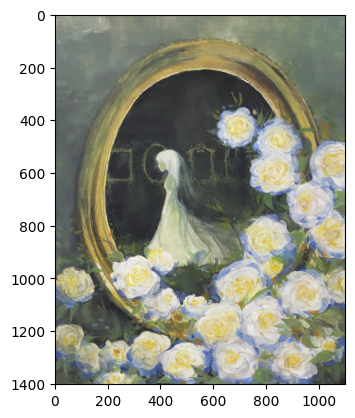

In [ ]:
#from matplotlib.image import imread

#img_arr = imread(filename)
# img_arr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img_arr)
#img_arr.shape
